# **LOAD** data(json)

In [3]:
# !pip install pandas
# !pip install pathlib
import json
import pandas as pd
from pathlib import Path

In [4]:
DIR = Path('/home/shsingh/knowledge_distillation/bliq')

input_file = DIR / 'CaseStudy' /  'questions.json'
output_file = DIR / 'final_submission' / 'cleanquest.json'

In [9]:
# Step 1: Load the dataset
def load_data(file_path):
  df = pd.read_json(file_path)
  df.head()
  return df


# Step 2: Identify and filter out questions with images
def filter_images(df):
  cnt=0
  image_question_ids=[]
  # Loop through the dataset to find questions with images
  for i in range(len(df['question'])):
    if df['question'].iloc[i].startswith('Refer to figure'):
      image_question_ids.append(df['id'].iloc[i])
      cnt+=1
  print("questions with images : " , cnt)
  # Filter out questions with images
  df_without_image=df[~(df.id.isin(image_question_ids))]
  return df_without_image


# Step 3: Clean explanations containing references to figures
def clean_explanation(explanation):
  #If explanation contains 'Refer to figure', remove it
  if 'Refer to figure' in explanation:
      return explanation.replace('Refer to figure','')
  else:
      return explanation


# Step 4: Save the cleaned data as JSON
def save_clean_data(df, output_file):
  json_objects=[]
  for i in range(len(df)):
      json_objects.append((df.iloc[i]).to_json())

  df.to_json(output_file,orient='records')
  df.to_csv(str(output_file).replace('json','csv'), index=False)


In [10]:
df = load_data(input_file)
df_without_image = filter_images(df)

df_without_image['clean_explanation']=df['explanation'].apply(clean_explanation)
save_clean_data(df_without_image, output_file)

questions with images :  220


/tmp/ipykernel_1671590/2002310244.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_image['clean_explanation']=df['explanation'].apply(clean_explanation)


In [5]:
# Load the cleaned data for further analysis (optional)
df_clean = pd.read_json(output_file)
df_clean

,question,answers,correct_answer,explanation,explanationImageHtml,id,clean_explanation
0,Mountain waves should be expected..,"[{'id': 1, 'answer': 'directly over the mounta...",on the downwind side of the mountain range.,Refer to figure.\nMOUNTAIN/LEE WAVES\ndevelop ...,"<div class=""mt10 fl wd100""> <div class=""fl tc ...",72880,".\nMOUNTAIN/LEE WAVES\ndevelop on the lee, or ..."
1,Which cloud poses the highest risk to aviation...,"[{'id': 1, 'answer': 'Cumulus fractus.'}, {'id...",Cumulonimbus.,Refer to figure.\nWhen cold air displaces warm...,"<div class=""mt10 fl wd100""> <div class=""fl tc ...",96266,".\nWhen cold air displaces warm air, it create..."
2,"According to ICAO Annex 3 definition, ""visibil...","[{'id': 1, 'answer': '1 is correct, 2 is corre...","1 is correct, 2 is incorrect.","In effect,\nvisibility\nis a measure of atmosp...",,96218,"In effect,\nvisibility\nis a measure of atmosp..."
3,"An aerodrome on the coast (Faro, Portugal) rep...","[{'id': 1, 'answer': 'Humidity reducing becaus...",A cold front crossing the area.,Refer to figure.\nNote: This question has two ...,"<div class=""mt10 fl wd100""> <div class=""fl tc ...",80606,.\nNote: This question has two correct answers...
4,Which of the following statements concerning a...,"[{'id': 1, 'answer': 'Air parcels that are for...",An isothermal layer is absolutely stable.,An isothermal layer is defined as a vertical c...,,72780,An isothermal layer is defined as a vertical c...
...,...,...,...,...,...,...,...
1447,A mountain range spans from North to South. A ...,"[{'id': 1, 'answer': 'Cloud base higher than 2...",Cloud base higher than 2 000 ft and colder air...,Refer to figure.\nThis question is a little tr...,"<div class=""mt10 fl wd100""> <div class=""fl tc ...",82192,.\nThis question is a little tricky as it is a...
1448,Which type of cloud is most likely to be encou...,"[{'id': 1, 'answer': 'Altocumulus'}, {'id': 2,...",Altocumulus,Refer to figure.\nNote: This question is quite...,"<div class=""mt10 fl wd100""> <div class=""fl tc ...",100595,".\nNote: This question is quite challenging, a..."
1449,Advection fog is most likely to form when:,"[{'id': 1, 'answer': 'maritime warm air flows ...",a mild moist airstream flows over snow covered...,Refer to figure.\nADVECTION FOG\n. Is formed b...,"<div class=""mt10 fl wd100""> <div class=""fl tc ...",73249,.\nADVECTION FOG\n. Is formed by the advection...
1450,Immediately following an extended flight at hi...,"[{'id': 1, 'answer': 'Mixed ice on the leading...",Frost forming around the fuel tanks due to col...,"Refer to figure.\nIn this scenario, the aircra...","<div class=""mt10 fl wd100""> <div class=""fl tc ...",82240,".\nIn this scenario, the aircraft has a very c..."


### Check duplicate questions:

In [6]:
question_counts = df_clean['question'].value_counts()
question_counts[question_counts > 1]

Which of the following statements is correct?                                                                                                                                                                                                                                                                                     5
Which of the following cloud types is found at high levels?                                                                                                                                                                                                                                                                       2
Snow grains:                                                                                                                                                                                                                                                                                                                      2
What has to be expected when

**Observation** : Even though the questions are duplicated the options and the correct answer associated with them is unique

# Plots

In [13]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

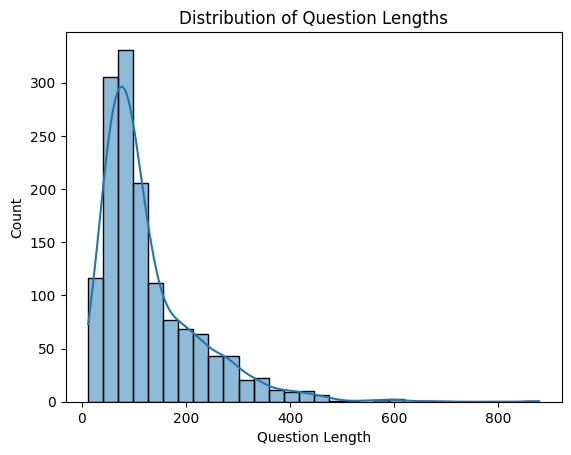

In [14]:
# the distribution of question lengths
df_clean['question_length'] = df_clean['question'].apply(len)
sns.histplot(df_clean['question_length'], bins=30, kde=True)
plt.title('Distribution of Question Lengths')
plt.xlabel('Question Length')
plt.show()

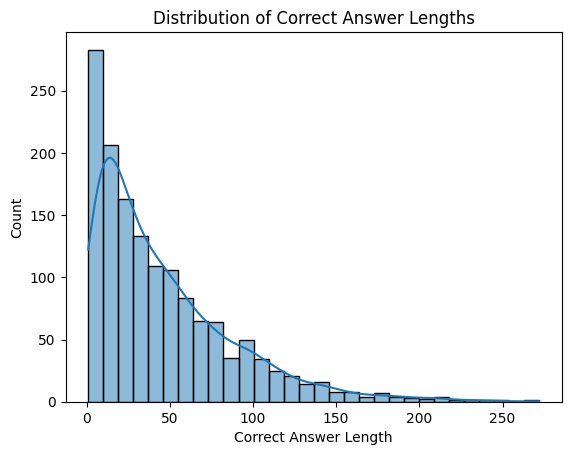

In [15]:
# Visualize the distribution of correct answer lengths
df_clean['correct_answer_length'] = df_clean['correct_answer'].apply(len)
sns.histplot(df_clean['correct_answer_length'], bins=30, kde=True)
plt.title('Distribution of Correct Answer Lengths')
plt.xlabel('Correct Answer Length')
plt.show()

In [16]:
df_clean['correct_answer_id'] = df_clean.apply(
    lambda row: next((ans['id'] for ans in row['answers'] if ans['answer'] == row['correct_answer']), None),
    axis=1
)
df_clean['correct_answer_id'] .value_counts()

1    400
2    396
3    345
4    311
Name: correct_answer_id, dtype: int64

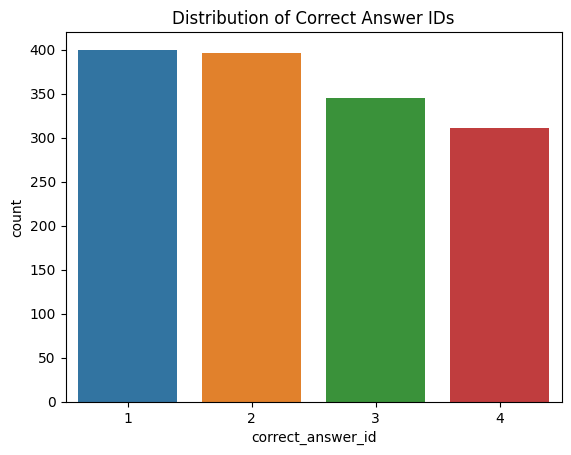

In [23]:
# Distribution of correct_answer_id
sns.countplot(x='correct_answer_id', data=df_clean, linewidth=0.5)
plt.title('Distribution of Correct Answer IDs')
plt.show()

# Selecting based on simlarity :

Top-1 option using embeddings of the question and the respective 4-options:

> Installations

In [26]:
# !pip install -q huggingface_hub
# !pip install -q sentence-transformers
# !pip install -q langchain

In [25]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util
from langchain.embeddings import HuggingFaceEmbeddings
import matplotlib.pyplot as plt

/scratch/shsingh/python/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The similarity between the question and all the options associated with the question is calculated one by one. The option with the maximum similarity score is considered to be the predicted answer. This predicted answer is then compared with the correct answer associated with the question. This is the starting point of the solution adhering to the Occams Razor principle.


**Observation**:
On the overall dataset(without image questions), this approach gives an accuracy of  **28.58\%** and on the test dataset(last 452 questions), this approach gives an accuracy of  **29.65\%** 

In [28]:
clean_questions=pd.read_json(output_file)

In [30]:
modelPath = "sentence-transformers/all-MiniLM-l6-v2"
#modelPath = "sentence-transformers/all-mpnet-base-v2"

# Create a dictionary with model configuration options, specifying to use the CPU for computations
model_kwargs = {'device':'cpu'}

# Create a dictionary with encoding options, specifically setting 'normalize_embeddings' to False
encode_kwargs = {'normalize_embeddings': False}

# Initialize an instance of HuggingFaceEmbeddings with the specified parameters
embeddings = HuggingFaceEmbeddings(
    model_name=modelPath,     # Provide the pre-trained model's path
    model_kwargs=model_kwargs, # Pass the model configuration options
    encode_kwargs=encode_kwargs # Pass the encoding options
)

In [31]:
def get_most_sim_answer(row):
  question=row['question']
  answer_options=row['answers']
  max_score=0
  max_answer=None
  embquest=embeddings.embed_query(question)
  for option in answer_options:
    score=util.pytorch_cos_sim(embquest, embeddings.embed_query(option['answer'])).item()
    if score>max_score:
      max_score=score
      max_answer=option['answer']
  return max_answer

In [39]:
clean_questions['most_similar_answer'] = clean_questions.apply(get_most_sim_answer, axis=1)
clean_questions['matched_with_embedding']=clean_questions['most_similar_answer']==clean_questions['correct_answer']
clean_questions['matched_with_embedding'].value_counts()
# Calculate accuracy
accuracy = clean_questions['matched_with_embedding'].sum() / len(clean_questions)
print(f'Accuracy: {accuracy:.2%}')

Accuracy: 28.58%


<Axes: >

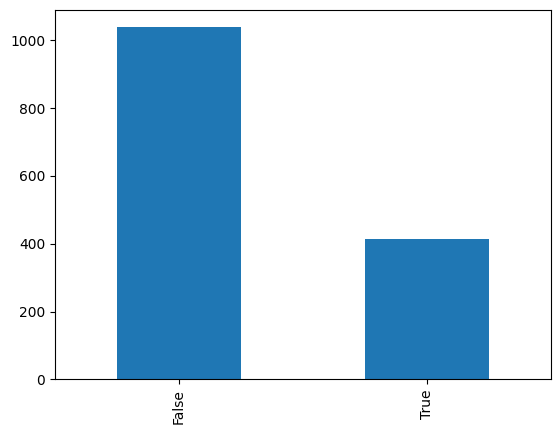

In [33]:
clean_questions['matched_with_embedding'].value_counts().plot(kind='bar')

False    318
True     134
Name: matched_with_embedding, dtype: int64
Accuracy: 29.65%


<Axes: >

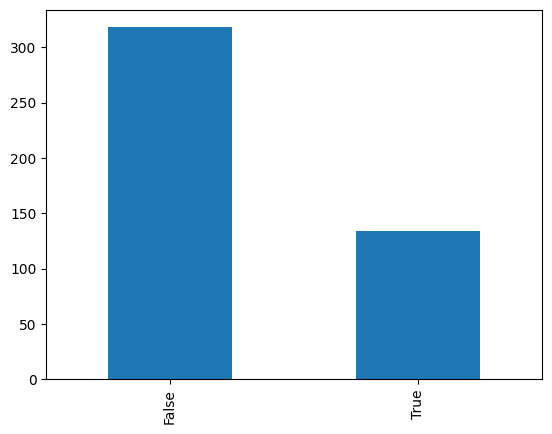

In [43]:
#TEST_SET only:

test_df = clean_questions.tail(452).reset_index(drop=True)
print(test_df['matched_with_embedding'].value_counts())
test_accuracy = test_df['matched_with_embedding'].sum() / len(test_df)
print(f'Accuracy: {test_accuracy:.2%}')
test_df['matched_with_embedding'].value_counts().plot(kind='bar')